In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler

In [2]:
! git clone https://github.com/taehojo/data.git

fatal: destination path 'data' already exists and is not an empty directory.


In [3]:
df = pd.read_csv('./220718_머신러닝8일차/pima-indians-diabetes3.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   diabetes   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
ss = StandardScaler()

In [7]:
X = df.iloc[:,0:8]
y = df.iloc[:,8]

In [8]:
scaled_X = pd.DataFrame(ss.fit_transform(X), columns=X.columns)

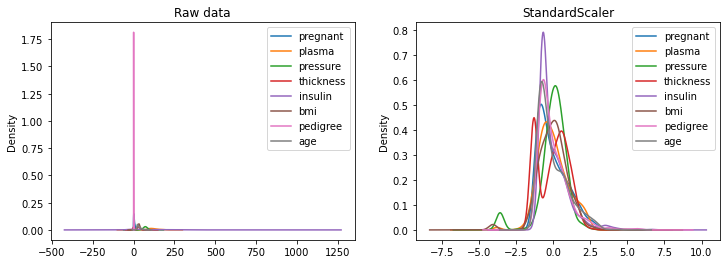

In [9]:
fig ,ax = plt.subplots(1, 2, figsize=(12,4))
X.plot(kind='kde', title='Raw data', ax=ax[0])
scaled_X.plot(kind='kde', title='StandardScaler', ax=ax[1])
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [11]:
## 결정트리

In [12]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)
print("Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

Accuracy: 68.74%
Standard Deviation: 6.87%


In [13]:
## 랜덤포레스트 분류기

In [14]:
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=50)
classifier.fit(X_train, y_train)
y_read = classifier.predict(X_test)
skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)
print("Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))


Accuracy: 75.88%
Standard Deviation: 4.88%


In [15]:
## 가우시안(정규분포)나이브 베이즈

In [16]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)
print("Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

Accuracy: 75.52%
Standard Deviation: 6.71%


In [17]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)
print("Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

Accuracy: 72.07%
Standard Deviation: 5.81%


In [18]:
## 에이다 부스트

In [19]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)
print("Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

Accuracy: 73.79%
Standard Deviation: 4.34%


In [20]:
## 이차판별분석

In [21]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifier = QuadraticDiscriminantAnalysis()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)
print("Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

Accuracy: 72.39%
Standard Deviation: 3.54%


In [22]:
## 서포트 벡터 머신

In [23]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)
print("Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

Accuracy: 75.18%
Standard Deviation: 3.91%


In [24]:
## 서포트 벡터 머신 - RBF 커널

In [25]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)
print("Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

Accuracy: 75.17%
Standard Deviation: 4.27%


In [26]:
## 보팅

In [30]:
from sklearn.ensemble import VotingClassifier
clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier()
clf3 = SVC(kernel='linear')
classifier = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)])
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)
print("Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

Accuracy: 76.03%
Standard Deviation: 6.10%


In [28]:
## 배깅

In [31]:
from sklearn.ensemble import  BaggingClassifier
classifier = BaggingClassifier(base_estimator=SVC(kernel='rbf'), n_estimators=10)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)
print("Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

Accuracy: 74.32%
Standard Deviation: 5.24%
